# NOTE for TransOMCS

Author: Doublu

Date: 2020年10月29日20:22:50

# TransOMCS 数据分析
如果想要直接使用TransOMCS，作者提供了资源下载[TransOMCS](https://hkustconnect-my.sharepoint.com/:u:/g/personal/hzhangal_connect_ust_hk/EVeNd_qvealEiTi7gs0Xu6sBbPIZI5ncD7Z1MBMdOz5CXw?e=VWCAbg)

## 查看前10行

In [2]:
with open('./Data/TransOMCS_full.txt/TransOMCS_full.txt', 'r') as f:
    for i in range(10):
        print(f.readline(), end="")

student	AtLocation	school	1.0
building	AtLocation	city	1.0
sugar	AtLocation	coffee	1.0
government	AtLocation	city	1.0
school	AtLocation	city	1.0
sign	AtLocation	book	1.0
title	AtLocation	book	1.0
curator	AtLocation	museum	1.0
leader	AtLocation	group	1.0
population	AtLocation	city	1.0


文本格式四元组`(h,r,t,s)`，按照`s`的值(得分)降序排列

## 数据统计

In [3]:
import pandas as pd
result = pd.read_csv('./Data/TransOMCS_full.txt/TransOMCS_full.txt', header=None, dtype=str, encoding='utf-8', sep='\t')
result.columns = ['head', 'relation', 'tail', 'score']

In [4]:
result

,head,relation,tail,score
0,student,AtLocation,school,1.0
1,building,AtLocation,city,1.0
2,sugar,AtLocation,coffee,1.0
3,government,AtLocation,city,1.0
4,school,AtLocation,city,1.0
...,...,...,...,...
18481602,nein,ReceivesAction,nein,0.00
18481603,concurrence,ReceivesAction,concur,0.00
18481604,slither,ReceivesAction,slither,0.00
18481605,establishment,ReceivesAction,ban,0.00


In [5]:
result.shape

(18481607, 4)

In [6]:
result['relation'].unique()

array(['AtLocation', 'CapableOf', 'Causes', 'CausesDesire', 'CreatedBy',
       'DefinedAs', 'Desires', 'HasA', 'HasPrerequisite', 'HasProperty',
       'HasSubevent', 'HasFirstSubevent', 'HasLastSubevent', 'InstanceOf',
       'MadeOf', 'MotivatedByGoal', 'PartOf', 'ReceivesAction', 'UsedFor',
       'LocatedNear'], dtype=object)

In [7]:
relationList = result['relation'].values.tolist()
import numpy as np
relationDict = dict(zip(*np.unique(relationList, return_counts=True)))
relationDict

{'AtLocation': 1969298,
 'CapableOf': 6145829,
 'Causes': 50439,
 'CausesDesire': 249755,
 'CreatedBy': 52957,
 'DefinedAs': 36,
 'Desires': 10668,
 'HasA': 1562961,
 'HasFirstSubevent': 2962,
 'HasLastSubevent': 14048,
 'HasPrerequisite': 43131,
 'HasProperty': 2127824,
 'HasSubevent': 18904,
 'InstanceOf': 777688,
 'LocatedNear': 19,
 'MadeOf': 114111,
 'MotivatedByGoal': 15322,
 'PartOf': 357486,
 'ReceivesAction': 1492915,
 'UsedFor': 3475254}

有20种关系，比代码`Train_and_Pridiction.py`中变量`all_relations`多一个关系`LocatedNear`

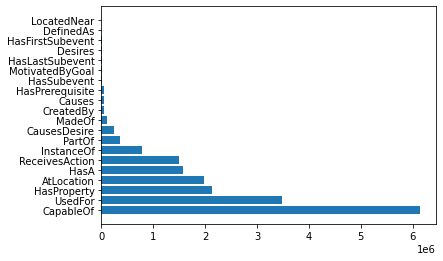

In [8]:
import matplotlib.pyplot as plt
def draw_from_dict(dicdata,RANGE, heng=0):
    #dicdata：字典的数据。
    #RANGE：截取显示的字典的长度。
    #heng=0，代表条状图的柱子是竖直向上的。heng=1，代表柱子是横向的。考虑到文字是从左到右的，让柱子横向排列更容易观察坐标轴。
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    if heng == 0:
        plt.bar(x[0:RANGE], y[0:RANGE])
        plt.show()
        return 
    elif heng == 1:
        plt.barh(x[0:RANGE], y[0:RANGE])
        plt.show()
        return 
    else:
        return "heng的值仅为0或1！"
draw_from_dict(relationDict,len(relationDict), 1)

可见，大多数的tuple集中在`CapableOf, UsedFor, HasProperty, AtLocation, HasA...`等前10个关系上

| Relation  Name   | Number of triplets | Reasonable Ratio | Example                                | 百分比 | 累积百分比 |
| ---------------- | ------------------ | ---------------- | -------------------------------------- | ------ | ---------- |
| CapableOf        | 6,145,829          | 58.40%           | (government, CapableOf, protect)       | 33%    | 33%        |
| UsedFor          | 3,475,254          | 50.80%           | (kitchen, UsedFor, eat in)             | 19%    | 52%        |
| HasProperty      | 2,127,824          | 59.10%           | (account, HasProperty,  established)   | 12%    | 64%        |
| AtLocation       | 1,969,298          | 51.30%           | (dryer, AtLocation, dishwasher)        | 11%    | 74%        |
| HasA             | 1,562,961          | 68.90%           | (forest, HasA, pool)                   | 8%     | 83%        |
| ReceivesAction   | 1,492,915          | 53.70%           | (news, ReceivesAction,  misattribute)  | 8%     | 91%        |
| InstanceOf       | 777,688            | 52.20%           | (atlanta, InstanceOf, city)            | 4%     | 95%        |
| PartOf           | 357,486            | 62.80%           | (player, PartOf, team)                 | 2%     | 97%        |
| CausesDesire     | 249,755            | 52.00%           | (music, CausesDesire, listen)          | 1%     | 98%        |
| MadeOf           | 114,111            | 55.30%           | (world, MadeOf, country)               | 1%     | 99%        |
| CreatedBy        | 52,957             | 64.60%           | (film, CreatedBy, director)            | 0%     | 99%        |
| Causes           | 50,439             | 53.40%           | (misinterpret, Causes,  apologize)     | 0%     | 99%        |
| HasPrerequisite  | 43,141             | 62.70%           | (doubt, HasPrerequisite, bring  proof) | 0%     | 100%       |
| HasSubevent      | 18,904             | 56.10%           | (be sure, HasSubevent, ask)            | 0%     | 100%       |
| MotivatedByGoal  | 15,322             | 55.80%           | (come, MotivatedByGoal, fun)           | 0%     | 100%       |
| HasLastSubevent  | 14,048             | 58.90%           | (hungry, HasLastSubevent, eat)         | 0%     | 100%       |
| Desires          | 10,668             | 56.40%           | (dog, Desires, play)                   | 0%     | 100%       |
| HasFirstSubevent | 2,962              | 58.40%           | (talk to, HasFirstSubevent,  call)     | 0%     | 100%       |
| DefinedAs        | 36                 | 37.50%           | (door, DefinedAs, entrance)            | 0%     | 100%       |
| LocatedNear      | 19                 | 85.70%           | (shoe, LocatedNear, foot)              | 0%     | 100%       |
| 合计             | 18,481,617         |                  |                                        | 100%   |            |

In [9]:
import ujson as json
with open('./Data/ranking_dataset.json/ranking_dataset.json', 'r') as f:
    data = json.load(f)

In [10]:
count = 0
for key in data:
    if count < 1:
        data = data[key]
    count += 1

# 运行"Pattern_Extraction.py"
输入：
- `./Data/TransOMCS_matched_data/node_matches.json`
- `./Data/TransOMCS_matched_data/edge_matches.json`
- `./Data/TransOMCS_matched_data/lemmatized_commonsense_knowledge.json`

输出：
- `./Data/gen/selected_patterns.json`——抽取出的pattern

生成 "selected_patterns.json"具体内容：
```python
{
    "AtLocation":[],
    "CapableOf":[],
    "Causes":[],
    "CausesDesire":[["()<-pobj<-to<-prep<-()",0.05121882393674596]],
    "CreatedBy":[["()<-dobj<-make->nsubj->()",0.07723729972176589]],
    "DefinedAs":[["()<-dobj<-windows<-dobj<-(-compound-)",0.06728499127633292]],
    "Desires":[],
    "HasA":[["()<-nsubj<-have->dobj->()",0.06845944809099487]],
    "HasPrerequisite":[],
    "HasProperty":[["()<-nsubj<-be->acomp->()",0.1947595277658415],["()->amod->()",0.10556070473314658]],
    "HasSubevent":[],
    "HasFirstSubevent":[["()<-Precedence<-have->dobj->()",0.07131425097760279]],
    "HasLastSubevent":[],
    "InstanceOf":[["()<-nummod<-star->nsubj->()",0.11430794309671953]],
    "LocatedNear":[],
    "MadeOf":[],
    "MotivatedByGoal":[],
    "PartOf":[],
    "ReceivesAction":[["()<-dobj<-()",0.31282380039997165]],
    "UsedFor":[["()<-pobj<-(-prep-)",0.09712524658996259],["()<-dobj<-()",0.05726327743680232]]
}
```

多次运行，仅得分微微变化，只有9个relation生成了11个pattern，与论文中平均每个relation 2.8个pattern不符，而且没有pattern的relation在后续的步骤中根本无法抽取knowledge，很奇怪？

# 运行Train_and_Predict.py

该脚本中变量"all_relations"少一个关系"LocatedNear"，是因为`current_data.random_sample_train_set()`无法选出训练集

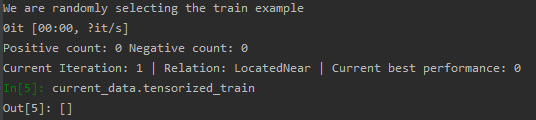

报错：
> RuntimeError: CUDA out of memory. Tried to allocate 2.76 GiB (GPU 0; 31.75 GiB total capacity; 26.90 GiB already allocated; 1.49 GiB free; 29.07 GiB reserved in total by PyTorch)

位置：
```python
predict(current_model, tmp_tensorized_data, r)

final_prediction = model(raw_sentences=tmp_example.all_observations, first_mask=tmp_example.all_head_masks,
                                 second_mask=tmp_example.all_tail_masks, all_frequencies=tmp_example.all_frequencies,
                                 all_types=tmp_example.all_types, adj_matrices=tmp_example.all_adj_matrices)  # 1 * 2

last_layer_pile = bert_last_layer.repeat(1, number_of_token, 1).view(
            [number_of_observation, number_of_token, number_of_token,
             768])  # [number_of_observation, number_of_token, number_of_token, embedding_size]
```
原因：

该元素的"eventuality_observations"或"edge_observations"所含item过多，而非json文件总的元素多
- ReceivesAction-16
- UsedFor-586

json文件问题片段如下所示：

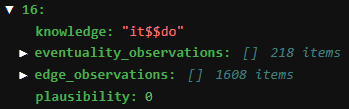

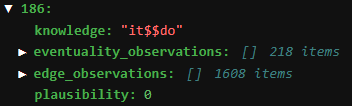

解决：

去除该元素

# 抽取的候选knowledge经过分类器打分后最终得到的knowledge
```python
{
    "CausesDesire": 102
    "CreatedBy": 47,
    "DefinedAs": 0,
    "HasA": 400,
    "HasProperty": 2134,
    "HasFirstSubevent": 68,
    "InstanceOf": 0,
    "ReceivesAction": 1418,
    "UsedFor": 1988
}

```

TransOMCS.txt: 6157 ,不知道为什么少一个